In [1]:
import numpy
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def features(data):
       
    data.loc[data.HEAP == 0.0, 'HEAP'] = 0
    data.loc[data.HEAP != 0.0, 'HEAP'] = 1
    
    data.loc[data.WIC == 0.0 ,'WIC'] = 0
    data.loc[data.WIC != 0.0 ,'WIC'] = 1
    
    data.loc[data.SchoolLunch == 0.0, 'SchoolLunch'] = 0
    data.loc[data.SchoolLunch != 0.0, 'SchoolLunch'] = 1

    data.loc[data.MOOP == 0.0, 'MOOP'] = 0
    data.loc[data.MOOP != 0.0, 'MOOP'] = 1

    data.loc[data.Childcare == 0.0, 'Childcare'] = 0
    data.loc[data.Childcare != 0.0, 'Childcare'] = 1

    data.loc[data.FoodStamps == 0.0, 'FoodStamps'] = 0
    data.loc[data.FoodStamps != 0.0, 'FoodStamps'] = 1

    data.loc[data.Commuting == 0.0, 'Commuting'] = 0
    data.loc[data.Commuting != 0.0, 'Commuting'] = 1

    data.loc[data.Housing == 0.0, 'Housing'] = 0
    data.loc[data.Housing != 0.0, 'Housing'] = 1
    
    data = data.loc[:, [u'PovunitType', u'WorkExpIndiv',
                  u'HEAP', u'CitizenStatus',
                  u'EducAttain',
                  u'WIC', u'HousingStatus',
                  u'WorkersEquiv', u'SchoolLunch',
                  u'MOOP', u'MV', u'Childcare', 
                  u'FoodStamps', u'Commuting',
                  u'Housing', 'Pov_risk']]
    return data

In [3]:
# thresholds = pd.Series(puma_05.CEO_Threshold.unique())

In [4]:
# thresholds.hist(bins=35)
# plt.vlines(x=thresholds.median(), ymin=0, ymax=18, color = 'red')
# plt.vlines(x=thresholds.mean(), ymin=0, ymax=18, color = 'yellow')

In [5]:
# puma_05[puma_05.CEO_Threshold == puma_05.CEO_Threshold.max()]

In [6]:
# thresholds.describe()

In [7]:
# thresholds.quantile(0.99)

In [8]:
# thresholds_of = pd.Series(puma_05.Official_Threshold.unique())

In [9]:
# thresholds_of.hist(bins=30)

# New check without aggregation

In [10]:
# puma_05.CEO_Income.describe()

In [11]:
# puma_05[puma_05.CEO_Income < 0]['PUMA'].hist()

In [12]:
# puma_05[puma_05.SERIALNO == 812]

In [13]:
# puma_05[puma_05.CEO_Income == 0]

In [14]:
# puma_05.CEO_Income.quantile(0.1)

In [15]:
# df[(df.CEO_Poverty == 1)&(df.CEO_Threshold < df.CEO_Income)][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [16]:
# df[(df.Pov_risk == 1)&((df.CEO_Poverty == 1))][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [17]:
X = df[[ u'PovunitType', u'WorkExpIndiv', u'Povunit',
        u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
        u'AgeCateg_2', u'AgeCateg_3', u'EducAttain',
        u'WIC', u'HousingStatus',
       u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
       u'MOOP', u'MV', u'Childcare', 
       u'NP', u'FoodStamps', u'Commuting',
       u'Housing', 'Pov_risk']]

NameError: name 'df' is not defined

In [61]:
X.columns

Index([u'PovunitType', u'WorkExpIndiv', u'Povunit', u'SchoolBreakfast',
       u'HEAP', u'CitizenStatus', u'AgeCateg_2', u'AgeCateg_3', u'EducAttain',
       u'WIC', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch',
       u'AgeCateg_1', u'MOOP', u'MV', u'Childcare', u'NP', u'FoodStamps',
       u'Commuting', u'Housing', u'Pov_risk'],
      dtype='object')

# Making continuous variables discrete

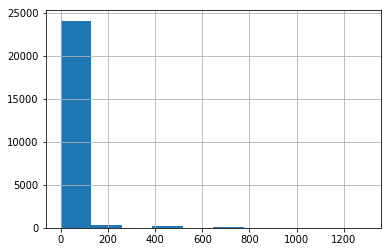

In [116]:
# print X.SchoolBreakfast.value_counts()
X.SchoolBreakfast.hist()

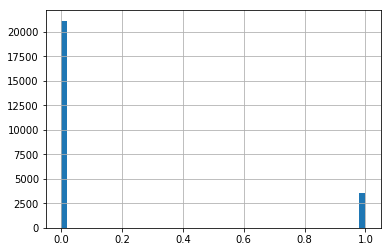

In [117]:
# print (X.HEAP).value_counts()
X.HEAP.hist(bins= 50)

In [64]:
X.HEAP[X.HEAP == 0.0] = 0
X.HEAP[X.HEAP != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
X.HEAP.value_counts()

0.0    21155
1.0     3545
Name: HEAP, dtype: int64

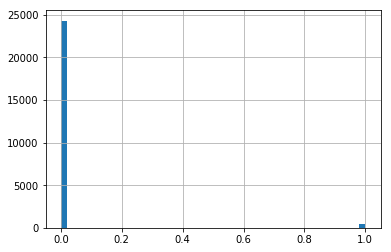

In [118]:
# print X.WIC.value_counts()
X.WIC.hist(bins=50)

In [67]:
X.WIC[X.WIC == 0.0] = 0
X.WIC[X.WIC != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [68]:
X.WIC.value_counts()

0.0    24304
1.0      396
Name: WIC, dtype: int64

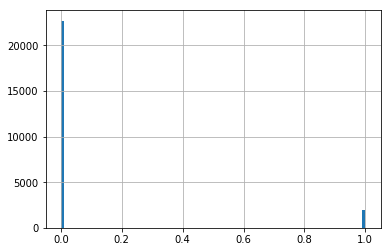

In [119]:
# print X.SchoolLunch.value_counts()
X.SchoolLunch.hist(bins = 100)

In [70]:
X.SchoolLunch[X.SchoolLunch == 0.0] = 0
X.SchoolLunch[X.SchoolLunch != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
X.SchoolLunch.value_counts()

0.0    22698
1.0     2002
Name: SchoolLunch, dtype: int64

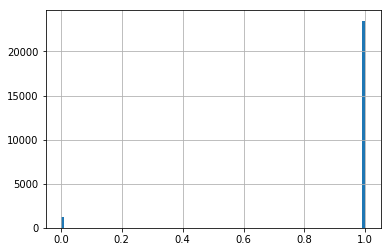

In [120]:
# print X.MOOP.describe()
(X.MOOP).hist(bins = 100)

In [73]:
X.MOOP[X.MOOP == 0.0] = 0
X.MOOP[X.MOOP != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


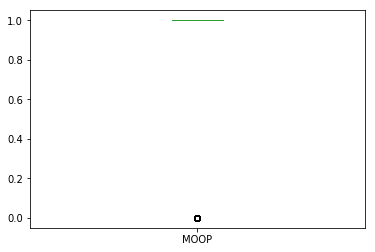

In [74]:
X.MOOP.plot.box()

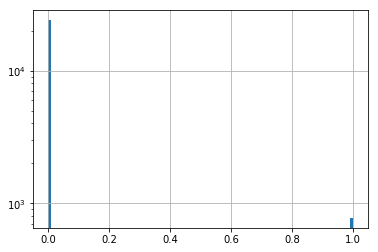

In [121]:
# print X.Childcare.value_counts()
X.Childcare.hist(log = True, bins=100)

In [78]:
X.Childcare[X.Childcare == 0.0] = 0
X.Childcare[X.Childcare != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


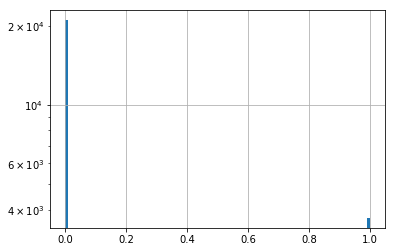

In [122]:
# print X.FoodStamps.value_counts()
X.FoodStamps.hist(bins=100, log = True)

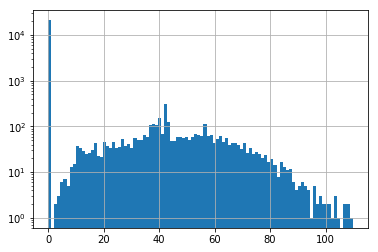

In [80]:
np.sqrt(X.FoodStamps).hist(bins=100, log = True)

In [81]:
X.FoodStamps[X.FoodStamps == 0.0] = 0
X.FoodStamps[X.FoodStamps != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
X.FoodStamps.value_counts()

0.0    20980
1.0     3720
Name: FoodStamps, dtype: int64

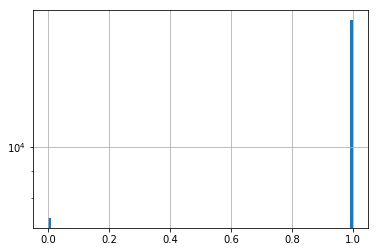

In [123]:
# print X.Commuting.value_counts()
X.Commuting.hist(log = True, bins=100)

In [84]:
X[(((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) < 0) &
  (((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) >= -1)].Pov_risk.value_counts()

2.0    8861
0.0    4293
1.0    3469
Name: Pov_risk, dtype: int64

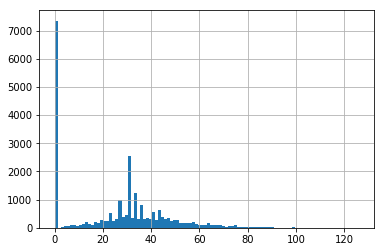

In [85]:
np.sqrt(X.Commuting).hist(bins= 100)

In [86]:
X[(np.sqrt(X.Commuting) < 10)].Pov_risk.value_counts()

2.0    3109
0.0    2969
1.0    1723
Name: Pov_risk, dtype: int64

In [87]:
X.Commuting[X.Commuting == 0.0] = 0
X.Commuting[X.Commuting != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


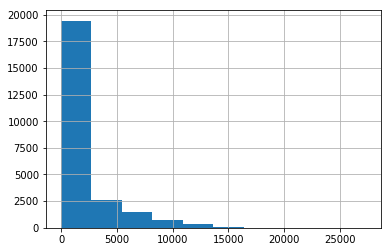

In [88]:
X.Housing.unique()
X.Housing.hist()

In [136]:
X.Housing[X.Housing == 0.0] = 0
X.Housing[X.Housing != 0.0] = 1

/gpfs1/cusp/vys217/.conda/envs/JVEvys217/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
puma_05 = pd.read_csv("../Data/Cleaned/puma_05.csv")
puma_05.drop(['Unnamed: 0'], axis=1, inplace=True)

X5 = features(puma_05)

train5,test5=train_test_split(X5,random_state=9,test_size=0.33)
hc5 = HillClimbSearch(train5, scoring_method=BicScore(train5))
best_model5 = hc5.estimate()

In [193]:
best_model5.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'PovunitType'),
 (u'HousingStatus', u'MV'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'SchoolLunch', u'CitizenStatus'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'FoodStamps'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'MOOP'),
 (u'HEAP', u'FoodStamps'),
 (u'HEAP', u'WIC'),
 (u'CitizenStatus', 'Pov_risk'),
 (u'Housing', u'HEAP'),
 (u'Housing', u'WorkExpIndiv'),
 (u'Housing', u'EducAttain'),
 (u'Housing', u'PovunitType'),
 (u'Housing', u'HousingStatus')]

In [171]:
puma_06 = pd.read_csv("../Data/Cleaned/puma_06.csv")
puma_06.drop(['Unnamed: 0'], axis=1, inplace=True)

X6 = features(puma_06)

train6,test6=train_test_split(X6,random_state=9,test_size=0.33)
hc6 = HillClimbSearch(train6, scoring_method=BicScore(train6))
best_model6 = hc6.estimate()

In [194]:
best_model6.edges()

[(u'WorkExpIndiv', u'SchoolLunch'),
 (u'WorkExpIndiv', u'PovunitType'),
 (u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'MV'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'WIC'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'Housing'),
 (u'HousingStatus', u'MV'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'SchoolLunch', u'PovunitType'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'Housing'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'FoodStamps'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'MOOP'),
 (u'HEAP', u'FoodStamps'),
 (u'FoodStamps', u'EducAttain'),
 (u'FoodStamps', u'HousingStatus')]

In [172]:
puma_07 = pd.read_csv("../Data/Cleaned/puma_07.csv")
puma_07.drop(['Unnamed: 0'], axis=1, inplace=True)

X7 = features(puma_07)

train7,test7=train_test_split(X7,random_state=9,test_size=0.33)
hc7 = HillClimbSearch(train7, scoring_method=BicScore(train7))
best_model7 = hc7.estimate()

In [195]:
best_model7.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'PovunitType'),
 (u'WorkExpIndiv', u'MV'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'Housing'),
 (u'HousingStatus', u'MV'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'Housing'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'FoodStamps'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'MOOP'),
 (u'HEAP', u'FoodStamps'),
 (u'FoodStamps', u'WIC'),
 (u'FoodStamps', u'HousingStatus'),
 (u'Housing', u'EducAttain')]

In [173]:
puma_08 = pd.read_csv("../Data/Cleaned/puma_08.csv")
puma_08.drop(['Unnamed: 0'], axis=1, inplace=True)

X8 = features(puma_08)

train8,test8=train_test_split(X8,random_state=9,test_size=0.33)
hc8 = HillClimbSearch(train8, scoring_method=BicScore(train8))
best_model8 = hc8.estimate()

In [196]:
best_model8.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'FoodStamps'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'MOOP'),
 (u'HousingStatus', u'MV'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'SchoolLunch', u'CitizenStatus'),
 (u'SchoolLunch', u'PovunitType'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'Housing'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'HousingStatus'),
 (u'PovunitType', u'Housing'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'FoodStamps'),
 (u'HEAP', u'WIC'),
 (u'HEAP', u'EducAttain'),
 (u'CitizenStatus', 'Pov_risk'),
 (u'Housing', u'FoodStamps'),
 (u'Housing', u'WorkExpIndiv'),
 (u'Housing', u'HEAP'),
 (u'Housing', u'HousingStatus')]

In [174]:
puma_09 = pd.read_csv("../Data/Cleaned/puma_09.csv")
puma_09.drop(['Unnamed: 0'], axis=1, inplace=True)

X9 = features(puma_09)

train9,test9=train_test_split(X9,random_state=9,test_size=0.33)
hc9 = HillClimbSearch(train9, scoring_method=BicScore(train9))
best_model9 = hc9.estimate()

In [197]:
best_model9.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'FoodStamps'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'Housing'),
 (u'HousingStatus', u'PovunitType'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'SchoolLunch', u'CitizenStatus'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'MOOP'),
 (u'PovunitType', u'Housing'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'MV', u'HousingStatus'),
 (u'HEAP', u'FoodStamps'),
 (u'HEAP', u'WIC'),
 (u'CitizenStatus', 'Pov_risk'),
 (u'Housing', u'FoodStamps'),
 (u'Housing', u'WorkExpIndiv'),
 (u'Housing', u'HEAP'),
 (u'Housing', u'E

In [175]:
puma_10 = pd.read_csv("../Data/Cleaned/puma_10.csv")
puma_10.drop(['Unnamed: 0'], axis=1, inplace=True)

X10 = features(puma_10)

train10,test10=train_test_split(X10,random_state=9,test_size=0.33)
hc10 = HillClimbSearch(train10, scoring_method=BicScore(train10))
best_model10 = hc10.estimate()

In [198]:
best_model10.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'FoodStamps'),
 (u'WorkExpIndiv', u'Childcare'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'FoodStamps'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'PovunitType'),
 (u'HousingStatus', u'MV'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'SchoolLunch', u'CitizenStatus'),
 (u'SchoolLunch', u'FoodStamps'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'WIC'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'HEAP'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'MOOP'),
 (u'HEAP', u'WIC'),
 (u'FoodStamps', u'EducAttain'),
 (u'FoodStamps', u'HEAP'),
 (u'CitizenStatus', 'Pov_risk'),
 (u'Housing', u'PovunitType'),
 (u'Housing', u'WorkExpIndiv'),
 (u'Housing', u'FoodStamps'),
 (u'H

In [176]:
puma_11 = pd.read_csv("../Data/Cleaned/puma_11.csv")
puma_11.drop(['Unnamed: 0'], axis=1, inplace=True)

X11 = features(puma_11)

train11,test11=train_test_split(X11,random_state=9,test_size=0.33)
hc11 = HillClimbSearch(train11, scoring_method=BicScore(train11))
best_model11 = hc11.estimate()

In [199]:
best_model11.edges()

[(u'WorkExpIndiv', u'SchoolLunch'),
 (u'WorkExpIndiv', u'PovunitType'),
 (u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'MV'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'HousingStatus'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'Housing'),
 (u'HousingStatus', u'MV'),
 (u'HousingStatus', u'HEAP'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'SchoolLunch', u'PovunitType'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'WIC'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'Commuting'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'FoodStamps'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'MOOP'),
 (u'HEAP', u'FoodStamps'),
 (u'FoodStamps', u'Housing'),
 (u'FoodStamps', u'WIC'),
 (u'Housing', u'EducAttain')]

In [177]:
puma_12 = pd.read_csv("../Data/Cleaned/puma_12.csv")
puma_12.drop(['Unnamed: 0'], axis=1, inplace=True)

X12 = features(puma_12)

train12,test12=train_test_split(X12,random_state=9,test_size=0.33)
hc12 = HillClimbSearch(train12, scoring_method=BicScore(train12))
best_model12 = hc12.estimate()

In [200]:
best_model12.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'MV'),
 (u'HousingStatus', u'HEAP'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'SchoolLunch', 'Pov_risk'),
 (u'SchoolLunch', u'WIC'),
 (u'SchoolLunch', u'PovunitType'),
 (u'SchoolLunch', u'HEAP'),
 (u'SchoolLunch', u'FoodStamps'),
 (u'SchoolLunch', u'Housing'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'HousingStatus'),
 (u'PovunitType', u'Housing'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'FoodStamps'),
 (u'FoodStamps', u'WorkExpIndiv'),
 (u'FoodStamps', 'Pov_risk'),
 (u'FoodStamps', u'WIC'),
 (u'FoodStamps', u'EducAttain'),
 (u'CitizenStatus', u'MOOP'),
 (u'Housing', u'FoodStamps'),
 (u'Housing', u'HEAP'),
 (u'Housing', u'HousingStatus'),
 (u'Housing

In [178]:
puma_13 = pd.read_csv("../Data/Cleaned/puma_13.csv")
puma_13.drop(['Unnamed: 0'], axis=1, inplace=True)

X13 = features(puma_13)

train13,test13=train_test_split(X13,random_state=9,test_size=0.33)
hc13 = HillClimbSearch(train13, scoring_method=BicScore(train13))
best_model13 = hc13.estimate()

In [201]:
best_model13.edges()

[(u'WorkExpIndiv', u'WorkersEquiv'),
 (u'WorkExpIndiv', u'FoodStamps'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'FoodStamps'),
 ('Pov_risk', u'SchoolLunch'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'EducAttain'),
 (u'WIC', u'PovunitType'),
 (u'WIC', 'Pov_risk'),
 (u'WIC', u'FoodStamps'),
 (u'WIC', u'HEAP'),
 (u'HousingStatus', u'Housing'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'Commuting'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'PovunitType', u'Commuting'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'MV'),
 (u'MV', u'WorkExpIndiv'),
 (u'MV', u'CitizenStatus'),
 (u'MV', u'HousingStatus'),
 (u'Childcare', u'WorkExpIndiv'),
 (u'HEAP', u'SchoolLunch'),
 (u'HEAP', u'EducAttain'),
 (u'HEAP', u'HousingStatus'),
 (u'FoodStamps', u'MOOP'),
 (u'FoodStamps', u'Housing'),
 (u'FoodStamps', u'HEAP'),
 (u'CitizenStatus', 'Pov_risk'),
 (u'Commuting', u'MOOP'),
 (u'Housing', u'MOOP')]

In [179]:
puma_14 = pd.read_csv("../Data/Cleaned/puma_14.csv")
puma_14.drop(['Unnamed: 0'], axis=1, inplace=True)

X14 = features(puma_14)

train14,test14=train_test_split(X14,random_state=9,test_size=0.33)
hc14 = HillClimbSearch(train14, scoring_method=BicScore(train14))
best_model14 = hc14.estimate()

In [202]:
best_model14.edges()

[(u'WorkExpIndiv', u'FoodStamps'),
 (u'WorkExpIndiv', u'MV'),
 (u'WorkExpIndiv', u'Childcare'),
 (u'WorkExpIndiv', u'HEAP'),
 ('Pov_risk', u'HousingStatus'),
 ('Pov_risk', u'WorkersEquiv'),
 ('Pov_risk', u'MOOP'),
 ('Pov_risk', u'SchoolLunch'),
 ('Pov_risk', u'HEAP'),
 ('Pov_risk', u'CitizenStatus'),
 (u'HousingStatus', u'PovunitType'),
 (u'HousingStatus', u'MV'),
 (u'HousingStatus', u'FoodStamps'),
 (u'WorkersEquiv', u'WorkExpIndiv'),
 (u'WorkersEquiv', u'Commuting'),
 (u'SchoolLunch', u'WIC'),
 (u'SchoolLunch', u'HEAP'),
 (u'PovunitType', u'WorkExpIndiv'),
 (u'PovunitType', u'WIC'),
 (u'PovunitType', u'WorkersEquiv'),
 (u'PovunitType', u'SchoolLunch'),
 (u'PovunitType', u'Childcare'),
 (u'PovunitType', u'Commuting'),
 (u'MV', u'CitizenStatus'),
 (u'HEAP', u'FoodStamps'),
 (u'FoodStamps', u'MOOP'),
 (u'FoodStamps', u'WIC'),
 (u'Commuting', u'MOOP'),
 (u'Housing', 'Pov_risk'),
 (u'Housing', u'HousingStatus'),
 (u'Housing', u'WorkersEquiv'),
 (u'Housing', u'PovunitType'),
 (u'Housing', 

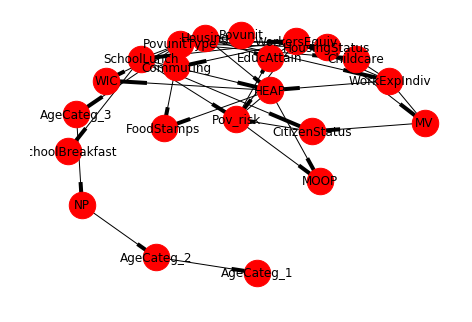

In [106]:
G = nx.DiGraph()
G.add_edges_from(best_model.edges())
nx.draw(G, with_labels=True, arrows=True, node_size=700)

# Bayes Net Updated Columns

In [65]:
cols = ['WorkersEquiv', 'SchoolLunch', 'FoodStamps', 'MOOP', 
        'EducAttain', 'HousingStatus', 'HEAP', 'Commuting', 'Pov_risk']

In [66]:
puma_05 = pd.read_csv("../Data/Cleaned/puma_05.csv")
puma_05.drop(['Unnamed: 0'], axis=1, inplace=True)

X5 = features(puma_05)
X5 = X5.loc[:,cols] 

train5,test5=train_test_split(X5,random_state=9,test_size=0.33)
hc5 = HillClimbSearch(train5, scoring_method=BicScore(train5))
best_model5 = hc5.estimate()

In [67]:
best_model5.edges()

[('Pov_risk', 'MOOP'),
 ('Pov_risk', 'FoodStamps'),
 ('Pov_risk', 'HEAP'),
 ('Pov_risk', 'EducAttain'),
 ('WorkersEquiv', 'HEAP'),
 ('WorkersEquiv', 'SchoolLunch'),
 ('WorkersEquiv', 'Pov_risk'),
 ('WorkersEquiv', 'EducAttain'),
 ('WorkersEquiv', 'HousingStatus'),
 ('SchoolLunch', 'Pov_risk'),
 ('SchoolLunch', 'HEAP'),
 ('HEAP', 'MOOP'),
 ('HEAP', 'FoodStamps'),
 ('FoodStamps', 'HousingStatus'),
 ('Commuting', 'WorkersEquiv'),
 ('Commuting', 'FoodStamps')]

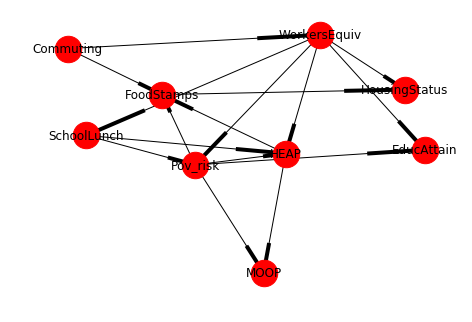

In [72]:
G = nx.DiGraph()
G.add_edges_from(best_model5.edges())
nx.draw(G, with_labels=True, arrows=True, node_size=700)

In [73]:
best_model5.fit(train5, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

In [74]:
for cpd in best_model5.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of Pov_risk:
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| SchoolLunch   | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) |
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| WorkersEquiv  | WorkersEquiv(1)  | WorkersEquiv(2)  | WorkersEquiv(3)  | WorkersEquiv(4)  | WorkersEquiv(5)  | WorkersEquiv(1)  | WorkersEquiv(2)  | WorkersEquiv(3)  | WorkersEquiv(4)  | WorkersEquiv(5)  |
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-

In [85]:
test5 = test5.astype(int)
test5.reset_index(inplace=True, drop=True)

In [87]:
# print (best_model5.predict(test5.loc[:,['WorkersEquiv', 'SchoolLunch', 'FoodStamps', 'MOOP', 'EducAttain',
#        'HousingStatus', 'HEAP', 'Commuting']]).Pov_risk==test5.Pov_risk).sum()*1.0/len(test5)

In [97]:
puma_06 = pd.read_csv("../Data/Cleaned/puma_06.csv")
puma_06.drop(['Unnamed: 0'], axis=1, inplace=True)

X6 = features(puma_06)
X6 = X6.loc[:,cols]
X6.dropna(inplace=True)

train6,test6=train_test_split(X6,random_state=9,test_size=0.33)
hc6 = HillClimbSearch(train6, scoring_method=BicScore(train6))
best_model6 = hc6.estimate()

In [98]:
best_model6.edges()

[('Pov_risk', 'MOOP'),
 ('Pov_risk', 'FoodStamps'),
 ('Pov_risk', 'HEAP'),
 ('Pov_risk', 'EducAttain'),
 ('WorkersEquiv', 'HEAP'),
 ('WorkersEquiv', 'SchoolLunch'),
 ('WorkersEquiv', 'Pov_risk'),
 ('WorkersEquiv', 'EducAttain'),
 ('WorkersEquiv', 'HousingStatus'),
 ('SchoolLunch', 'Pov_risk'),
 ('SchoolLunch', 'HEAP'),
 ('HEAP', 'MOOP'),
 ('HEAP', 'FoodStamps'),
 ('FoodStamps', 'EducAttain'),
 ('FoodStamps', 'HousingStatus'),
 ('Commuting', 'WorkersEquiv')]

In [99]:
best_model6.fit(train6, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

In [100]:
for cpd in best_model6.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of Pov_risk:
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| SchoolLunch   | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(0.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) | SchoolLunch(1.0) |
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| WorkersEquiv  | WorkersEquiv(1)  | WorkersEquiv(2)  | WorkersEquiv(3)  | WorkersEquiv(4)  | WorkersEquiv(5)  | WorkersEquiv(1)  | WorkersEquiv(2)  | WorkersEquiv(3)  | WorkersEquiv(4)  | WorkersEquiv(5)  |
+---------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-

In [106]:
test6_t = test6.loc[:,['WorkersEquiv', 'SchoolLunch', 'FoodStamps', 'MOOP', 'EducAttain',
       'HousingStatus', 'HEAP', 'Commuting']]

In [108]:
test6 = test6.astype(int)
test6.reset_index(inplace=True, drop=True)
best_model6.predict(test6_t.loc[:,['WorkersEquiv', 'SchoolLunch', 'FoodStamps', 'MOOP', 'EducAttain',
       'HousingStatus', 'HEAP', 'Commuting']]).Pov_risk

IndexError: index 5 is out of bounds for axis 2 with size 5

In [105]:
test6[test6.index == 5]

,WorkersEquiv,SchoolLunch,FoodStamps,MOOP,EducAttain,HousingStatus,HEAP,Commuting,Pov_risk
5,1,0,0,1,4,9,0,1,2


In [ ]:
puma_07 = pd.read_csv("../Data/Cleaned/puma_07.csv")
puma_07.drop(['Unnamed: 0'], axis=1, inplace=True)

X7 = features(puma_07)
X7 = X7.loc[:,cols] 

train7,test7=train_test_split(X7,random_state=9,test_size=0.33)
hc7 = HillClimbSearch(train7, scoring_method=BicScore(train7))
best_model7 = hc7.estimate()

In [ ]:
puma_08 = pd.read_csv("../Data/Cleaned/puma_08.csv")
puma_08.drop(['Unnamed: 0'], axis=1, inplace=True)

X8 = features(puma_08)
X8 = X8.loc[:,cols] 

train8,test8=train_test_split(X8,random_state=9,test_size=0.33)
hc8 = HillClimbSearch(train8, scoring_method=BicScore(train8))
best_model8 = hc8.estimate()

In [ ]:
puma_09 = pd.read_csv("../Data/Cleaned/puma_09.csv")
puma_09.drop(['Unnamed: 0'], axis=1, inplace=True)

X9 = features(puma_09)
X9 = X9.loc[:,cols] 

train9,test9=train_test_split(X9,random_state=9,test_size=0.33)
hc9 = HillClimbSearch(train9, scoring_method=BicScore(train9))
best_model9 = hc9.estimate()

In [ ]:
puma_10 = pd.read_csv("../Data/Cleaned/puma_10.csv")
puma_10.drop(['Unnamed: 0'], axis=1, inplace=True)

X10 = features(puma_10)
X10 = X10.loc[:,cols] 

train10,test10=train_test_split(X10,random_state=9,test_size=0.33)
hc10 = HillClimbSearch(train10, scoring_method=BicScore(train10))
best_model10 = hc10.estimate()

In [ ]:
puma_11 = pd.read_csv("../Data/Cleaned/puma_11.csv")
puma_11.drop(['Unnamed: 0'], axis=1, inplace=True)

X11 = features(puma_11)
X11 = X11.loc[:,cols] 

train11,test11=train_test_split(X11,random_state=9,test_size=0.33)
hc11 = HillClimbSearch(train11, scoring_method=BicScore(train11))
best_model11 = hc11.estimate()

In [ ]:
puma_12 = pd.read_csv("../Data/Cleaned/puma_12.csv")
puma_12.drop(['Unnamed: 0'], axis=1, inplace=True)

X12 = features(puma_12)
X12 = X12.loc[:,cols] 

train12,test12=train_test_split(X12,random_state=9,test_size=0.33)
hc12 = HillClimbSearch(train12, scoring_method=BicScore(train12))
best_model12 = hc12.estimate()

In [ ]:
puma_13 = pd.read_csv("../Data/Cleaned/puma_13.csv")
puma_13.drop(['Unnamed: 0'], axis=1, inplace=True)

X13 = features(puma_13)
X13 = X13.loc[:,cols] 

train13,test13=train_test_split(X13,random_state=9,test_size=0.33)
hc13 = HillClimbSearch(train13, scoring_method=BicScore(train13))
best_model13 = hc13.estimate()

In [ ]:
puma_14 = pd.read_csv("../Data/Cleaned/puma_14.csv")
puma_14.drop(['Unnamed: 0'], axis=1, inplace=True)

X14 = features(puma_14)
X14 = X14.loc[:,cols] 

train14,test14=train_test_split(X14,random_state=9,test_size=0.33)
hc14 = HillClimbSearch(train14, scoring_method=BicScore(train14))
best_model14 = hc14.estimate()